In [2]:
import pandas as pd
from textblob import TextBlob
import csv
import re
import time
import string
import matplotlib.pyplot as plt

In [7]:
x = "hermana abuelito superado peligro covid guerrera duda viejita ojo fiebre tos sintomas covid virus afecto presion alta perdio habla recuperada alta"

In [8]:
x

'hermana abuelito superado peligro covid guerrera duda viejita ojo fiebre tos sintomas covid virus afecto presion alta perdio habla recuperada alta'

In [9]:
TextBlob(x).translate(from_lang='es', to='en').sentiment

Sentiment(polarity=0.14, subjectivity=0.4266666666666666)

In [3]:
df = pd.read_csv('./muestra.csv', sep=';')

In [4]:
df

,id,text,Paralleldots,Sentiment140,Meaningcloud,LexalTics
0,2,hermana abuelito superado peligro covid guerre...,neutral,negative,negative,negativo
1,1001,cuerpo debia preparado superar virus rutina al...,neutral,negative,negative,negativo
2,2000,indignante inconcebible contagiarse covid salv...,neutral,neutral,neutral,negativo
3,3007,covid evidencio tremenda desigualdad existe pa...,negative,neutral,negative,negativo
4,4003,atencion covid ministra gobierno maria paula r...,positive,neutral,positive,neutro
...,...,...,...,...,...,...
133,133012,avanza implementacion modelo intervencion inte...,neutral,neutral,positive,neutro
134,134013,campaña viene desafiando masivamente covid imp...,neutral,neutral,sin sentimieno,neutro
135,135014,nuevas disposiciones evitar propagacion covid,neutral,neutral,negative,neutro
136,136036,mañana hable medicos amigos familia covid guay...,positive,neutral,negative,negativo


In [5]:
def get_polarity(text):
  analysis = TextBlob(text)
  if text != '':
    if analysis.detect_language() == 'es':
      result = analysis.translate(from_lang = 'es', to = 'en').sentiment.polarity
      time.sleep(5)
      return result

In [6]:
df['Texblob'] = df['text'].apply(get_polarity)

In [20]:
def x_range(x):
  if x > 0:
    return 1
  elif x == 0:
    return 0
  else:
    return -1


In [1]:
df['resTexblob'] = df['Texblob'].apply(x_range)

NameError: name 'df' is not defined

In [60]:
df

,id,text,Paralleldots,Sentiment140,Meaningcloud,LexalTics
0,2,hermana abuelito superado peligro covid guerre...,neutral,negative,negative,negativo
1,1001,cuerpo debia preparado superar virus rutina al...,neutral,negative,negative,negativo
2,2000,indignante inconcebible contagiarse covid salv...,neutral,neutral,neutral,negativo
3,3007,covid evidencio tremenda desigualdad existe pa...,negative,neutral,negative,negativo
4,4003,atencion covid ministra gobierno maria paula r...,positive,neutral,positive,neutro
...,...,...,...,...,...,...
133,133012,avanza implementacion modelo intervencion inte...,neutral,neutral,positive,neutro
134,134013,campaña viene desafiando masivamente covid imp...,neutral,neutral,sin sentimieno,neutro
135,135014,nuevas disposiciones evitar propagacion covid,neutral,neutral,negative,neutro
136,136036,mañana hable medicos amigos familia covid guay...,positive,neutral,negative,negativo


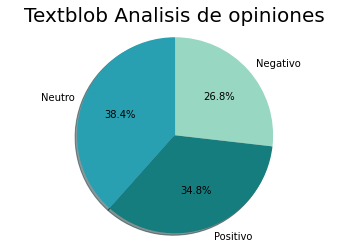

In [25]:

import matplotlib.pyplot as plt
labels = 'Neutro', 'Positivo', 'Negativo'
colors = ['#29A0B1','#167D7F','#98D7C2']
plt.pie(df['resTexblob'].value_counts(), labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.title('Textblob Analisis de opiniones', fontsize = 20)
plt.axis('equal')
plt.show()

In [23]:
df.to_csv('muestraTextblob.csv', sep=';')

In [41]:
import nltk
nltk.download('vader_lexicon') # Obligatorio para usar SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

#import hunspell # Nos ayudará con los diccionarios en español
# Buscar diccionarios en carpeta de instalacion
# Más diccionarios de idiomas disponibles en: https://github.com/wooorm/dictionaries/tree/master/dictionaries
#diccionario = hunspell.HunSpell('/content/es_MX.dic','/content/es_MX.aff')


from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AlejandroDeLaTorre\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package vader_lexicon is already up-to-date!


In [61]:

  for i in range(len(df)):#len(df)
      try:
          temp=df['text'][i]    
          # translation= translate_client.translate(temp,target_language='en',source_language='es') # Already translated
          # translation=translation['translatedText'] # Already translated
          p=sid.polarity_scores(str(temp))['compound']
          neg=sid.polarity_scores(str(temp))['neg']
          neu=sid.polarity_scores(str(temp))['neu']
          pos=sid.polarity_scores(str(temp))['pos']
          df.loc[i,'polaridad NLTK']=p
          df.loc[i,'pos']=pos
          df.loc[i,'neg']=neg
          df.loc[i,'neu']=neu
          print(i,end=' - ')
      except Exception as e:
          print('Error {}:{}'.format(i,e))

0 - 1 - 2 - 3 - 4 - 5 - 6 - 7 - 8 - 9 - 10 - 11 - 12 - 13 - 14 - 15 - 16 - 17 - 18 - 19 - 20 - 21 - 22 - 23 - 24 - 25 - 26 - 27 - 28 - 29 - 30 - 31 - 32 - 33 - 34 - 35 - 36 - 37 - 38 - 39 - 40 - 41 - 42 - 43 - 44 - 45 - 46 - 47 - 48 - 49 - 50 - 51 - 52 - 53 - 54 - 55 - 56 - 57 - 58 - 59 - 60 - 61 - 62 - 63 - 64 - 65 - 66 - 67 - 68 - 69 - 70 - 71 - 72 - 73 - 74 - 75 - 76 - 77 - 78 - 79 - 80 - 81 - 82 - 83 - 84 - 85 - 86 - 87 - 88 - 89 - 90 - 91 - 92 - 93 - 94 - 95 - 96 - 97 - 98 - 99 - 100 - 101 - 102 - 103 - 104 - 105 - 106 - 107 - 108 - 109 - 110 - 111 - 112 - 113 - 114 - 115 - 116 - 117 - 118 - 119 - 120 - 121 - 122 - 123 - 124 - 125 - 126 - 127 - 128 - 129 - 130 - 131 - 132 - 133 - 134 - 135 - 136 - 137 - 

In [62]:
df

,id,text,Paralleldots,Sentiment140,Meaningcloud,LexalTics,polaridad NLTK,pos,neg,neu
0,2,hermana abuelito superado peligro covid guerre...,neutral,negative,negative,negativo,0.0000,0.0,0.000,1.000
1,1001,cuerpo debia preparado superar virus rutina al...,neutral,negative,negative,negativo,-0.5267,0.0,0.180,0.820
2,2000,indignante inconcebible contagiarse covid salv...,neutral,neutral,neutral,negativo,-0.2960,0.0,0.167,0.833
3,3007,covid evidencio tremenda desigualdad existe pa...,negative,neutral,negative,negativo,-0.5267,0.0,0.188,0.812
4,4003,atencion covid ministra gobierno maria paula r...,positive,neutral,positive,neutro,0.0000,0.0,0.000,1.000
...,...,...,...,...,...,...,...,...,...,...
133,133012,avanza implementacion modelo intervencion inte...,neutral,neutral,positive,neutro,0.0000,0.0,0.000,1.000
134,134013,campaña viene desafiando masivamente covid imp...,neutral,neutral,sin sentimieno,neutro,0.0000,0.0,0.000,1.000
135,135014,nuevas disposiciones evitar propagacion covid,neutral,neutral,negative,neutro,0.0000,0.0,0.000,1.000
136,136036,mañana hable medicos amigos familia covid guay...,positive,neutral,negative,negativo,0.0000,0.0,0.000,1.000


In [63]:
df['Mejor_Ajuste_NLTK'] = df['polaridad NLTK'].apply(x_range)

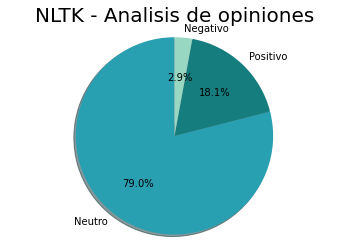

In [64]:
import matplotlib.pyplot as plt
labels = 'Neutro', 'Positivo', 'Negativo'
colors = ['#29A0B1','#167D7F','#98D7C2']
plt.pie(df['Mejor_Ajuste_NLTK'].value_counts(), labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.title('NLTK - Analisis de opiniones', fontsize = 20)
plt.axis('equal')
plt.show()

In [65]:
df.to_csv('muestraNLTK.csv', sep=';')